In [1]:
import os
import glob
import numpy as np
import xarray as xr

import cartopy.crs as ccrs
import cartopy.feature as cf

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [2]:
base_dir = os.path.join('/','home','arturo','Downloads','MERGE_INPE')

In [4]:
file_list = glob.glob(os.path.join(base_dir, '*.grib2'))
file_list = sorted(file_list)
file_len = len(file_list)
print(f'Number of files: {file_len}')

Number of files: 40


In [24]:
DATA

<xarray.Dataset> Size: 3MB
Dimensions:     (latitude: 701, longitude: 493)
Coordinates:
    time        datetime64[ns] 8B 2018-01-02T15:00:00
    step        timedelta64[ns] 8B ...
    surface     float64 8B ...
  * latitude    (latitude) float64 6kB -56.95 -56.85 -56.75 ... 12.95 13.05
  * longitude   (longitude) float64 4kB 277.9 278.0 278.1 ... 326.9 327.0 327.1
    valid_time  datetime64[ns] 8B ...
Data variables:
    rdp         (latitude, longitude) float32 1MB 0.0 0.0 0.0 ... 0.0 0.0 0.0
    prmsl       (latitude, longitude) float32 1MB ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             consensus
    GRIB_centreDescription:  Consensus
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             Consensus
    history:                 2025-05-12T12:58 GRIB to CDM+CF via cfgrib-0.9.1...

In [22]:
PRE = None
time = []
for nn in range(file_len):
    DATA = xr.open_dataset(file_list[nn])
    if PRE is None:
        lon = DATA.longitude.values
        lat = DATA.latitude.values
        PRE = np.zeros([file_len,len(lat),len(lon)])

    else:
        PRE[nn,:,:] = DATA['rdp'].values
        time.append(DATA.time.values)

In [26]:
lat[2]-lat[1]

np.float64(0.10000000000000142)

In [15]:
lon2d, lat2d = np.meshgrid(lon, lat)

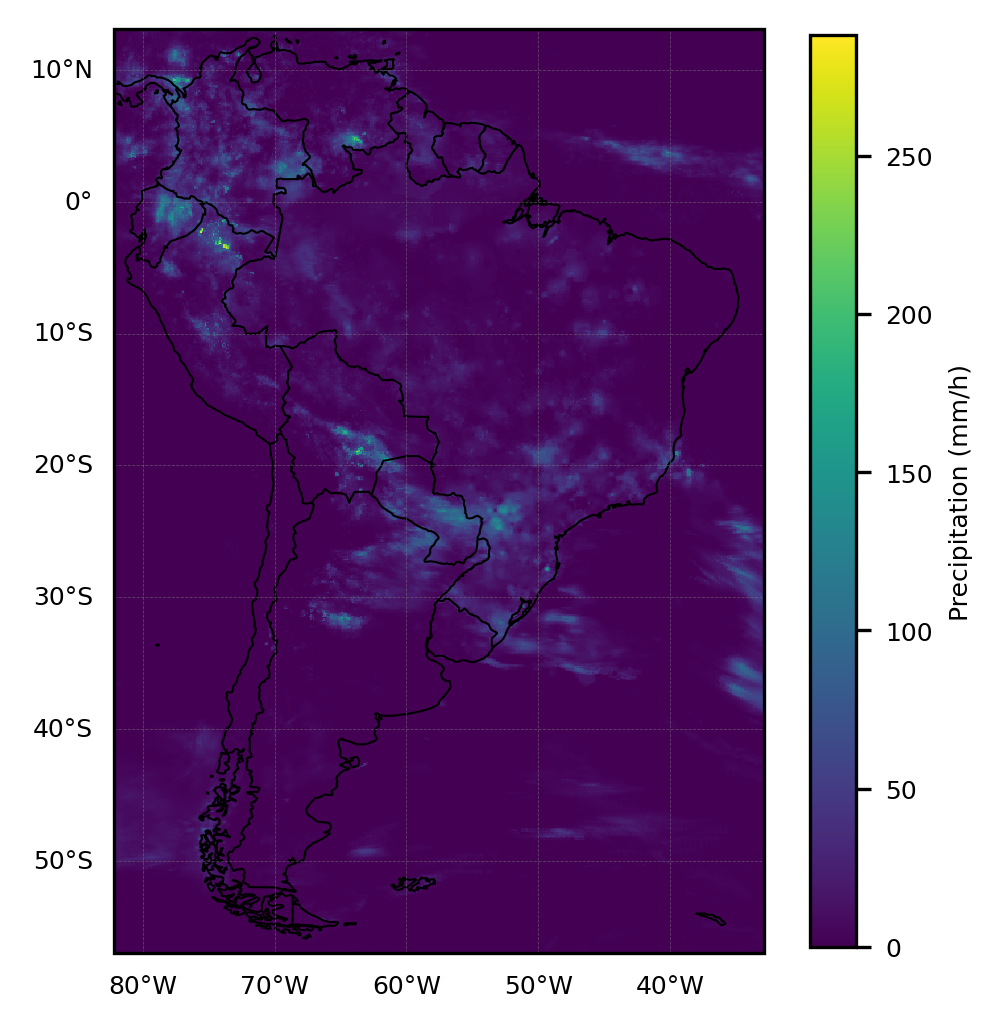

In [27]:
proj = ccrs.PlateCarree()
fig = plt.figure(figsize=(4,4),dpi=300)
gs = gridspec.GridSpec(1,1)

#==================================================================================================
ax1 = plt.subplot(gs[0, 0], projection = proj)
# ax1.set_extent([-180, -30, -60, 70],crs=proj)
ax1.add_feature(cf.COASTLINE,linewidth=0.5, linestyle='-',edgecolor='k')
ax1.add_feature(cf.BORDERS, linewidth=0.5, linestyle='-', edgecolor='k')

a1 = ax1.pcolormesh(lon2d, lat2d, np.nansum(PRE,axis=0))

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.left_labels = True
gl.right_labels = False
gl.xlabel_style = {'size': 6, 'color': 'k'}
gl.ylabel_style = {'size': 6, 'color': 'k'}

cbar = plt.colorbar(a1, orientation='vertical', pad=0.05, fraction=0.049)
cbar.set_label('Precipitation (mm/h)', fontsize=6)
cbar.ax.tick_params(labelsize=6)

ax1.set_facecolor('white')
fig.patch.set_alpha(0)